In [37]:
import numpy
numSamples = 1600
x= numpy.random.rand(numSamples, 1)
y = x**3
noise = numpy.random.randn(numSamples,1)
y_withNoise = y+noise

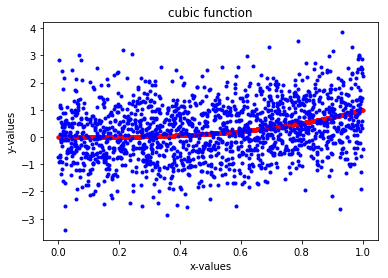

In [38]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(x, y, "r.")
plt.plot(x, y_withNoise, "b.")
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('cubic function')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_withNoise, test_size = 0.2, random_state=42)
print("Number samples in training:", len(x_train))
print("Number samples in testing:", len(x_test))

Number samples in training: 1280
Number samples in testing: 320


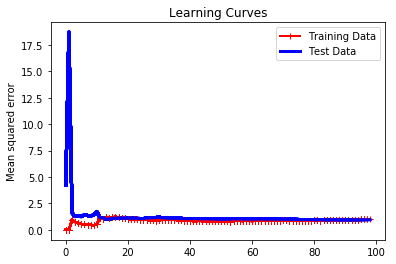

In [45]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
def plot_learning_curves(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y_withNoise, test_size = 0.2, random_state=42)
    train_errors, test_errors= [], []
    for m in range(1, 100):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_test_predict = model.predict(x_test)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        test_errors.append(mean_squared_error(y_test_predict, y_test))
        plt.plot(train_errors, "r-+", linewidth =2, label = "Training Data")
        plt.plot(test_errors, "b-", linewidth = 3, label = "Test Data")
        plt.ylabel('Mean squared error')
        plt.title('Learning Curves')
        if m==1:
            plt.legend() #显示图例

linear_reg_model = linear_model.LinearRegression()
plot_learning_curves(linear_reg_model, x, y_withNoise)     



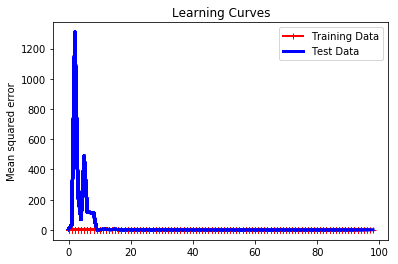

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=5, include_bias = False)
x_poly = poly_features.fit_transform(x)
def plot_learning_curves(model, x, y):
    x_polyTrain, x_polyTest, y_polyTrain, y_polyTest = train_test_split(x_poly, y_withNoise, test_size = 0.2, random_state = 42)
    train_errors, test_errors= [], []
    for m in range(1, 100):
        model.fit(x_polyTrain[:m], y_polyTrain[:m])
        y_polyTrain_predict = model.predict(x_polyTrain[:m])
        y_polyTest_predict = model.predict(x_polyTest)
        train_errors.append(mean_squared_error(y_polyTrain_predict, y_polyTrain[:m]))
        test_errors.append(mean_squared_error(y_polyTest_predict, y_polyTest))
        plt.plot(train_errors, "r-+", linewidth =2, label = "Training Data")
        plt.plot(test_errors, "b-", linewidth = 3, label = "Test Data")
        plt.ylabel('Mean squared error')
        plt.title('Learning Curves')
        if m==1:
            plt.legend() 

poly_model = linear_model.LinearRegression()
plot_learning_curves(poly_model, x_poly, y_withNoise)     


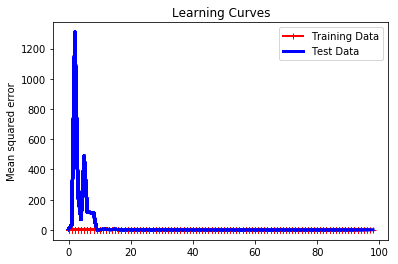

In [46]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias = False)
x_poly = poly_features.fit_transform(x)

poly_model = linear_model.LinearRegression()
plot_learning_curves(poly_model, x_poly, y_withNoise)     


In [23]:
from sklearn.datasets import load_diabetes

diabetes_data=load_diabetes()
diabetes_data.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

In [24]:
from sklearn.model_selection import train_test_split

x_real = diabetes_data.data
y_real = diabetes_data.target
x_real_train, x_real_test, y_real_train, y_real_train = train_test_split(x_real, y_real, test_size = 0.2, random_state = 42)
print("Number samples in training:", len(x_real_train))
print("Number samples in testing:", len(x_real_test))

Number samples in training: 353
Number samples in testing: 89


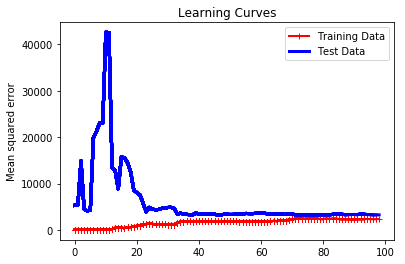

In [31]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

def plot_learning_curves(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
    train_errors, test_errors= [], []
    for m in range(1, 100):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_test_predict = model.predict(x_test)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        test_errors.append(mean_squared_error(y_test_predict, y_test))
        plt.plot(train_errors, "r-+", linewidth =2, label = "Training Data")
        plt.plot(test_errors, "b-", linewidth = 3, label = "Test Data")
        plt.ylabel('Mean squared error')
        plt.title('Learning Curves')
        if m ==1:
            plt.legend()
        
linear_reg_model=linear_model.LinearRegression()
plot_learning_curves(linear_reg_model, x_real, y_real)



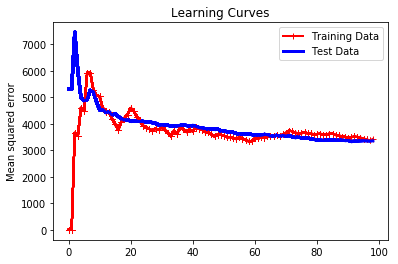

In [26]:
ridge_model = linear_model.Ridge(alpha=0.5)

plot_learning_curves(ridge_model, x_real, y_real)     

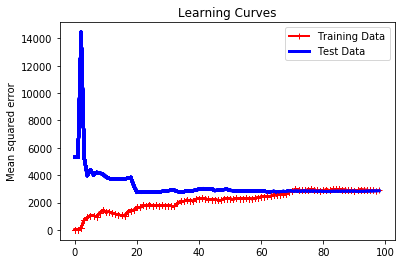

In [27]:
lasso_model = linear_model.Lasso(alpha=0.5)
plot_learning_curves(lasso_model, x_real, y_real)     

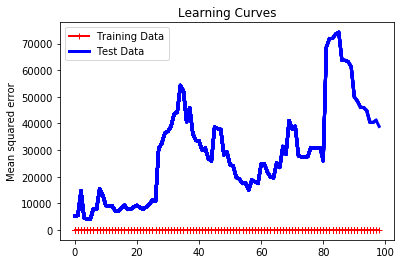

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4, include_bias = False)
x_poly = poly_features.fit_transform(x_real)

poly_model = linear_model.LinearRegression()
plot_learning_curves(poly_model, x_poly, y_real)     

In [33]:
import pandas as pd
test_errors=[]
test_errors.append(mean_squared_error(y_test_predict, y_test))
d={'modelname':['linear_reg_model','ridge_model','lasso_model','poly_model'],'test_errors':test_errors}
d1=pd.DataFrame(d)
print(d1)

NameError: name 'y_test_predict' is not defined

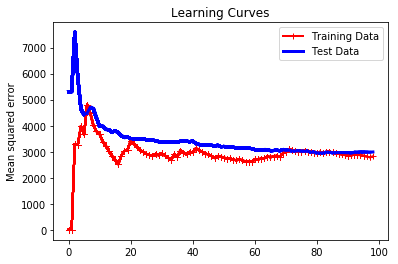

In [32]:
ridge_model = linear_model.Ridge(alpha=0.2)

plot_learning_curves(ridge_model, x_real, y_real)     

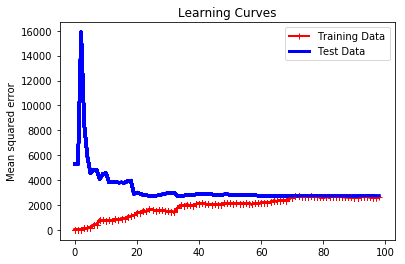

In [33]:
lasso_model = linear_model.Lasso(alpha=0.2)
plot_learning_curves(lasso_model, x_real, y_real)     

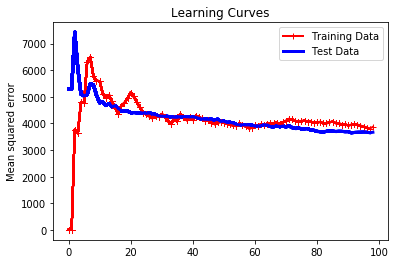

In [34]:
ridge_model = linear_model.Ridge(alpha=0.8)

plot_learning_curves(ridge_model, x_real, y_real)     

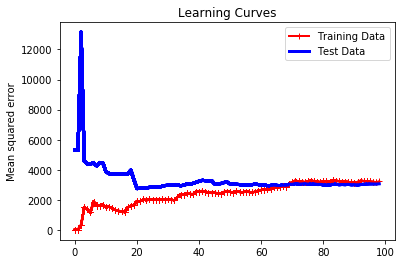

In [35]:
lasso_model = linear_model.Lasso(alpha=0.8)
plot_learning_curves(lasso_model, x_real, y_real)     